In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [6]:
import ld_gan
from sklearn.mixture import GaussianMixture
from time import time
import numpy as np
from ld_gan.utils.nearest_neighbors import nn_gpu

In [48]:
n_imgs_per_class = 10
PROJECT = "xf_111v1.py"
EPOCH = 350
n_interpols = 7

In [11]:
gen = ld_gan.utils.model_handler.load_model(PROJECT, EPOCH, "gen")
enc = ld_gan.utils.model_handler.load_model(PROJECT, EPOCH, "enc")

loaded model 'projects/xf_111v1.py/model/g_0350.pth'
loaded model 'projects/xf_111v1.py/model/e_0350.pth'


In [3]:
X, Y = ld_gan.data_proc.data_loader.load_data(1, verbose=1, resize = 64)

100%|██████████| 102/102 [00:56<00:00,  2.19it/s]

load data from '/export/home/oblum/projects/ld_gan/data/flowers_102/jpg_256'


In [12]:
Z = ld_gan.utils.model_handler.apply_model(enc, X, 100)

In [4]:
Y = np.argmax(Y, axis = 1)

In [14]:
c = 0
xc = X[Y==c]
zc = Z[Y==c]

In [8]:
x_batch = xc[np.random.randint(0, len(xc), n_imgs_per_class)]

In [13]:
z_batch = ld_gan.utils.model_handler.apply_model(enc, x_batch)

In [18]:
nn_idxs = nn_gpu(zc, z_batch, 2)

In [46]:
x_pairs = xc[nn_idxs]

In [50]:
"1".zfill(3)

'001'

<IPython.core.display.Javascript object>


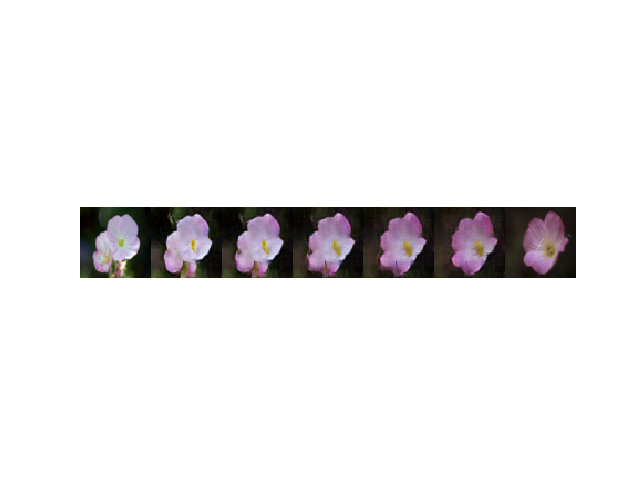

<IPython.core.display.Javascript object>


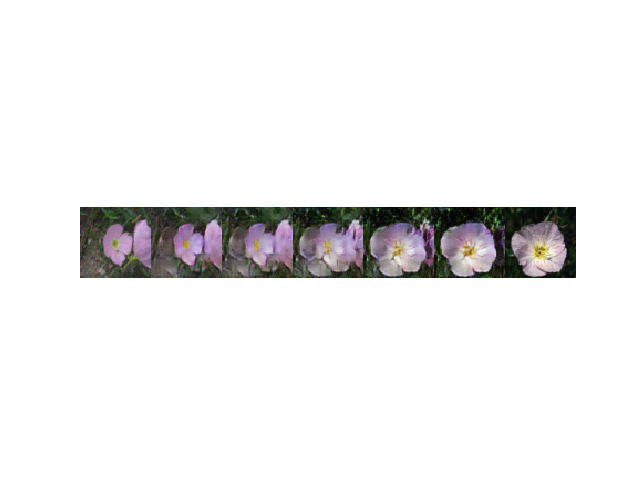

<IPython.core.display.Javascript object>


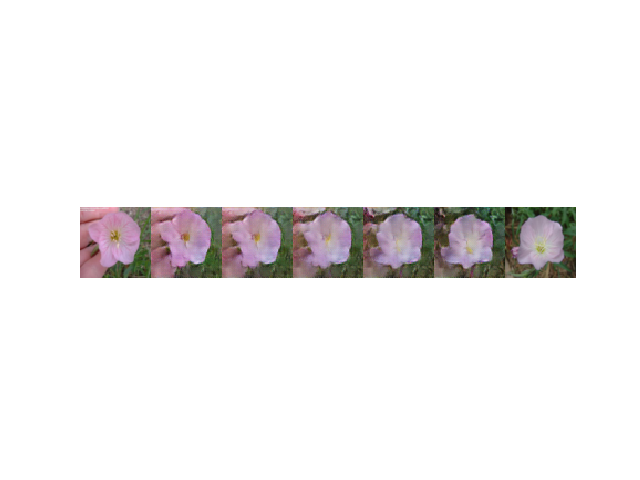

<IPython.core.display.Javascript object>


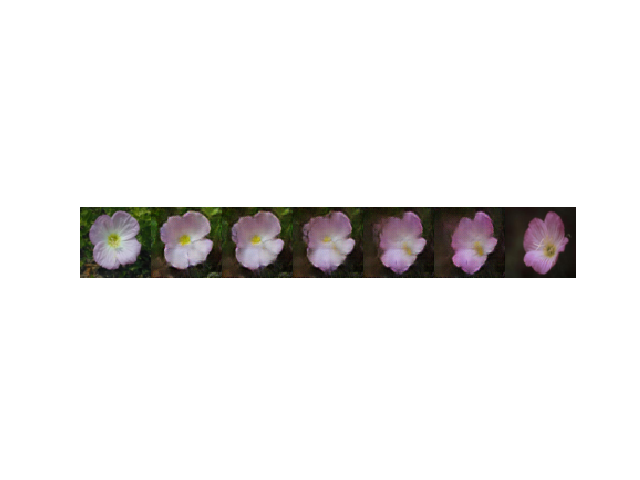

<IPython.core.display.Javascript object>


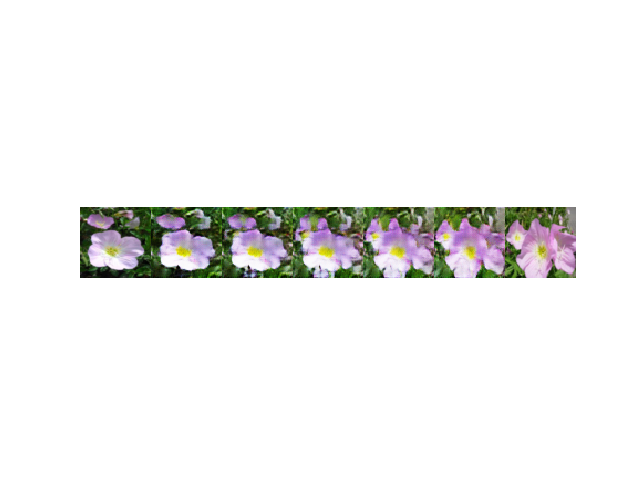

<IPython.core.display.Javascript object>


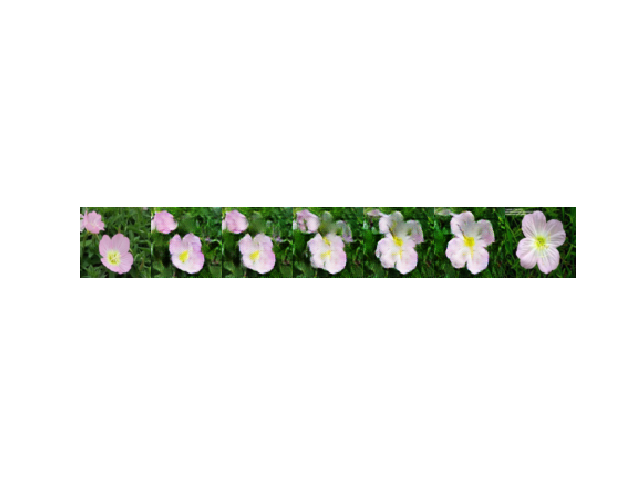

<IPython.core.display.Javascript object>


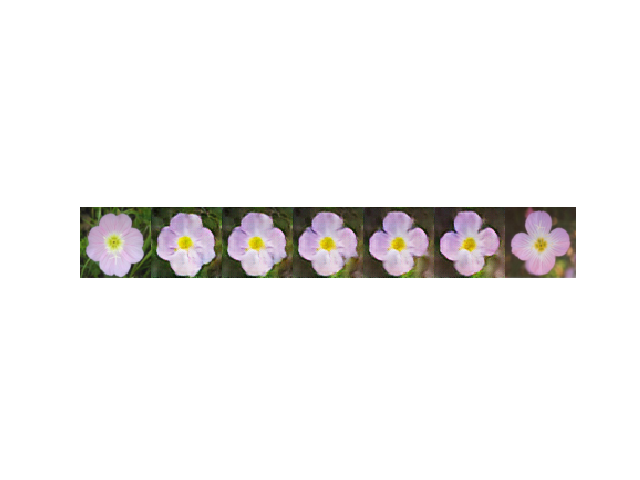

<IPython.core.display.Javascript object>


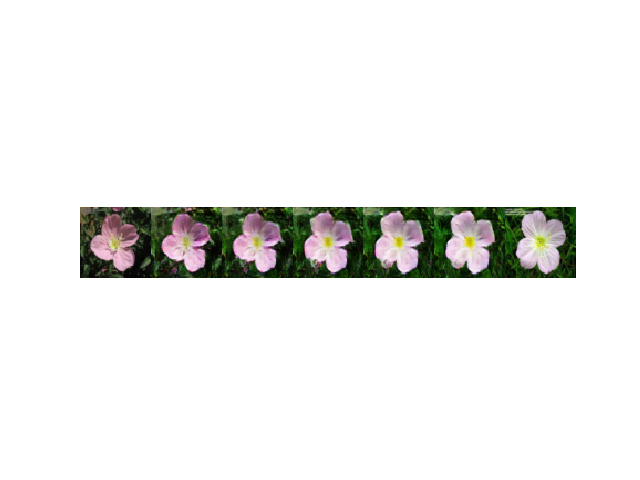

<IPython.core.display.Javascript object>


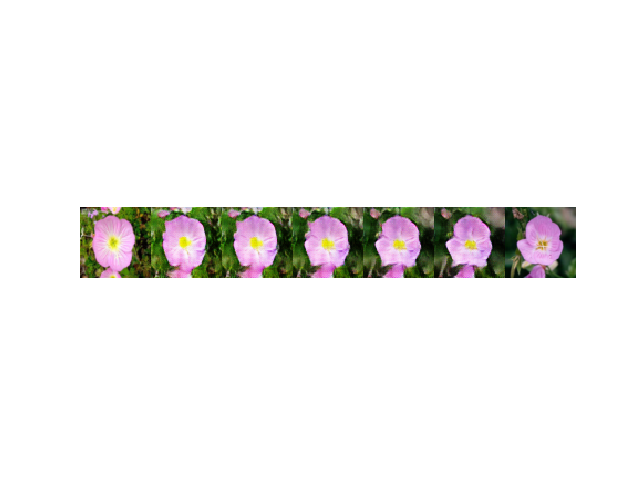

<IPython.core.display.Javascript object>


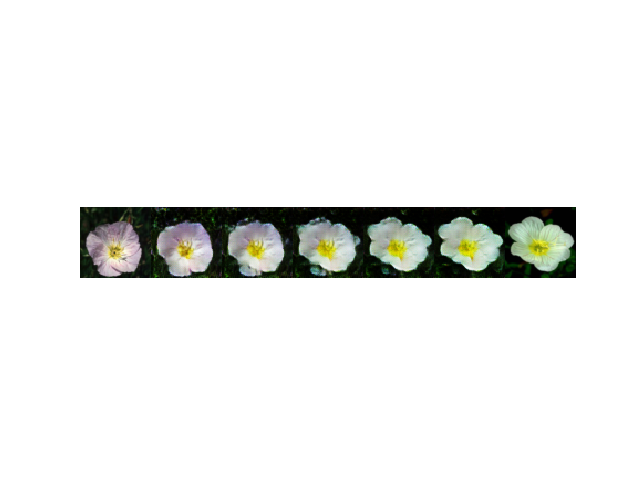

In [49]:
for x_pair in x_pairs:
    img1, img2 = x_pair
    img = ld_gan.utils.model_handler.get_interpol_imgs(enc, gen, 
                                                       img1, img2, 
                                                       n_interpols=n_interpols)
    ld_gan.visualize.disp(np.array([img]))

In [ ]:
for i in range(n_imgs):
    
    factor = i / float(n_imgs-1.)
    
    

In [25]:
nn_idxs[0]

array([11, 21])

In [43]:
def get_interpol_imgs_(enc, gen, 
                        img1, img2, 
                        n_interpols = 7, 
                        concat = True):
    
    z1, z2 = ld_gan.utils.model_handler.apply_model(enc, np.array([img1, img2]))
    zs = [z2*factor+z1*(1-factor) for factor in np.linspace(0, 1, n_interpols)]
    zs = np.array(zs)
    imgs = ld_gan.utils.model_handler.apply_model(gen, zs)
    
    if concat:
        imgs[0] = img1
        imgs[-1] = img2
        img = np.concatenate(imgs, axis=1)
        return img
    else:
        return imgs

In [44]:
img = get_interpol_imgs(enc, gen, xc[11], xc[21])

<IPython.core.display.Javascript object>


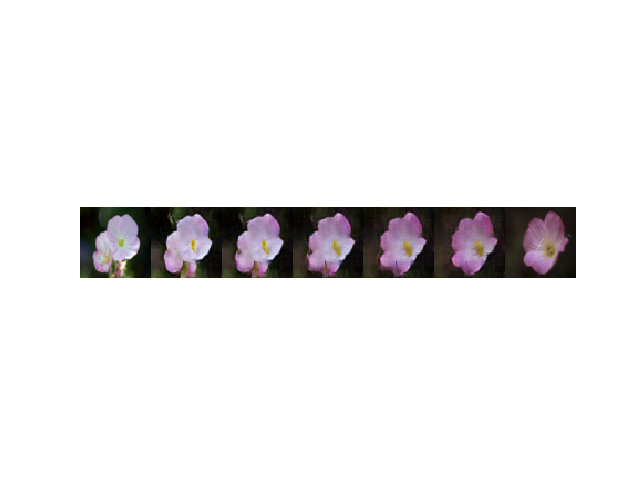

In [45]:
ld_gan.visualize.disp(np.array([img]))

In [21]:
n_interpols = 7

In [22]:
[idx / float(n_interpols-1.) for idx in range(n_interpols)]

[0.0,
 0.16666666666666666,
 0.3333333333333333,
 0.5,
 0.6666666666666666,
 0.8333333333333334,
 1.0]

In [23]:
np.linspace(0, 1, n_interpols)

array([ 0.        ,  0.16666667,  0.33333333,  0.5       ,  0.66666667,
        0.83333333,  1.        ])

In [19]:
for x in range(n_imgs_x):
    for y in range(n_imgs_y):

        x_factor = x / float(n_imgs-1.)
        y_factor = y / float(n_imgs-1.)


        z_00_factor = (1. - x_factor) * (1. - y_factor)
        z_10_factor = (x_factor) * (1. - y_factor)
        z_01_factor = (1. - x_factor) * (y_factor)
        z_11_factor = (x_factor) * (y_factor)

        z_enc = Z_enc_00 * z_00_factor + \
                Z_enc_10 * z_10_factor + \
                Z_enc_01 * z_01_factor + \
                Z_enc_11 * z_11_factor

        z_enc = np.array([z_enc])

        if sampler is not None:
            z_enc = sampler(z_enc)

        img_fake = ld_gan.utils.model_handler.apply_model(gen, z_enc)

        pos_x_min = x * img_size
        pos_x_max = (x+1) * img_size
        pos_y_min = y * img_size
        pos_y_max = (y+1) * img_size

        arr_img[pos_x_min:pos_x_max, pos_y_min:pos_y_max] = img_fake

array([[11, 21],
       [30, 13],
       [23, 24],
       [ 1, 21],
       [10, 16],
       [37, 29],
       [ 9,  8],
       [14, 29],
       [33,  7],
       [13, 35]])

In [10]:
BATCH_SIZE  = 128
PROJECT = "xf_111v1.py"
EPOCH = 350
enc = ld_gan.utils.model_handler.load_model(PROJECT, EPOCH, "enc")
sampler = ld_gan.sample.nn_sampler_life(enc, X, Y, 
                                        BATCH_SIZE, 
                                        nn_search_radius = 10,
                                        n_neighbors = 2)

loaded model 'projects/xf_111v1.py/model/e_0350.pth'


In [11]:
_, _, Z, _, nn_idxs, _, _ = sampler.next()

In [22]:
nn_idxs = np.array(nn_idxs)

In [44]:
y = Y[nn_idxs[:, 0]] == Y[nn_idxs[:, 1]]
y = y.astype(np.int)
y[y==0] = -1
y[y==1] = Y[nn_idxs[:, 0]][y==1]

In [45]:
y

array([ -1,  98,  -1,  -1,  63,  13,  84,  49,  90,  99,  67,  44,  -1,
        54,  45,  48,  81,   3,  -1,  74,  15,  36,  82,  73,  59, 101,
        62,  -1,  33,  90,  48,  33,  74,  45,  -1,  -1,  -1,  -1,  45,
        -1,  95,  97,  -1,  -1,  83,  -1,  70,  29,  -1,  -1,  19,  -1,
        -1,  -1,  -1,  74,  -1,  63,  21,  -1,  -1,  -1,  -1,  11,  99,
        -1,  85,  15,  47,  77,  59,  59,  -1,  -1,  -1,  -1,  -1,  59,
        67,  -1,  97,  -1,  -1,  -1,  93,  87,  90,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  81,  -1,  27,  -1,  71,  56,  18,  -1,  75,  -1,
        76,  89,  -1,  -1,   3,  -1,  29,  -1,  57,  87,  52,  -1,  -1,
        -1,  77,  -1,  49,  -1,  63,  77,  12,  56,  58,  17])

In [4]:
LATENT_SIZE = 512
enc = ld_gan.models.enc.Enc(n_features = LATENT_SIZE, 
                            w_norm=True)
enc.cuda()
enc = enc.apply(ld_gan.models.init_weights)

In [5]:
z_enc = ld_gan.utils.model_handler.apply_model(enc, X, 100)

RuntimeError: dimension out of range (expected to be in range of [-2, 1], but got 3)